# Beta Detector

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

import soundfile as sf

In [4]:
threshold = .25
binc = 30
data, rate = sf.read("../sample_3.flac")
print(f"shape: {data.shape}, rate: {rate}")

shape: (63204635, 2), rate: 44100


<BarContainer object of 10 artists>

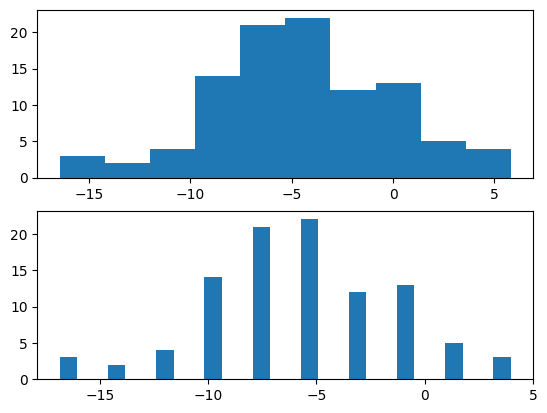

In [5]:
class EnergyClass:
    e_mix: float
    e_max: float
    freq: int

    def __init__(self, e_min: float, e_max: float):
        self.e_min = e_min
        self.e_max = e_max
        self.freq = 0

def calculate_frequencies(data: list, n_bins: int, _filter = lambda _: True) -> list:
    m = min(data)
    bin_width = (max(data) - min(data)) / n_bins
    histogram = [ EnergyClass(m + i * bin_width, m + (i+1) * bin_width) for i in range(n_bins) ]
    filtered = filter(_filter, data)
    for value in filtered:
        for bin in histogram:
            if value >= bin.e_min and value < bin.e_max:
                bin.freq += 1
    return histogram


# TEST

n_bins = 10
sample = [np.random.normal(-5,5) for _ in range(0,100,1)]
results = calculate_frequencies(sample, n_bins)
bar_data = []

for bin in results:
    bar_data.append([bin.e_min, bin.freq])

fig, axs = plt.subplots(2)
# axs[1].plot(sample, '*')
axs[0].hist(sample, bins=n_bins)
axs[1].bar([entry[0] for entry in bar_data], [entry[1] for entry in bar_data])

In [6]:
# %matplotlib qt
%matplotlib inline

abs_wf = [abs(x) for x in data[:,1]]
bars = calculate_frequencies(abs_wf, binc, lambda e: e >= threshold)

fig, axs = plt.subplots(2, constrained_layout=True)
# fig.set_size_inches(12,5)
# fig.tight_layout()

axs[0].set_title("Detected signal")
axs[0].set_xlabel(f"Samples [rate: {rate}/s]")
axs[0].set_ylabel("Normalized intensity")
axs[0].plot(abs_wf, c='g', label="signal")
axs[0].axhline(threshold, ls='--', c='tab:orange', label="threshold")
# axs[0].legend()

axs[1].set_title("Energies spectrum")
axs[1].set_xlabel("Normalized classes")
axs[1].set_ylabel("Frequency")
axs[1].hist(list(filter(lambda e: e >= threshold, abs_wf)), bins=binc, label="frequencies")
# axs[1].legend()

# axs[2].bar([b.e_min for b in bars], [b.freq for b in bars]) # mmmh that's not right

plt.show()

: 

In [ ]:
plt.scatter([i/len(bars) for i in range(len(bars))], [b.freq for b in bars])